# Predicting Stock Movement Using Social Media Sentiment

**Author:** Monsuru Adebisi  
**Date:** 06/26/2025  
**Objective:** Predict the direction of stock market movement using sentiment analysis from social media/news data.



## 1. Introduction

This project explores how social media sentiment can influence short-term stock market movements. The goal is to analyze whether online opinions from platforms like Reddit and Twitter, or news headlines, can help predict whether a stock index will go up or down.

By combining sentiment analysis with historical stock price data, this project uses machine learning models to identify any patterns or correlations. It applies natural language processing (NLP) techniques to analyze the sentiment of daily news, and then checks if there's a relationship between that sentiment and stock performance.


## 2. Dataset Overview

The dataset used in this project is the **Combined News and DJIA** dataset from Kaggle. It includes daily news headlines and labels indicating whether the Dow Jones Industrial Average (DJIA) went up (1) or down (0) on that day.

- Each row corresponds to a specific trading day.
- It contains 25 headlines per day.
- The target column is named `Label` (1 for up, 0 for down).

Source: [https://www.kaggle.com/datasets/aaron7sun/stocknews](https://www.kaggle.com/datasets/aaron7sun/stocknews)


In [15]:
# Install required libraries (run once)

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB


## 3.Data Loading and Exploration

In [16]:
# 3.1 Load the Dataset

import pandas as pd

# Load the CSV file
df = pd.read_csv("Combined_News_DJIA.csv")

# Display the first 10 rows
df.head(10)


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [17]:
# 3.2 Check dataset shape and column names

# Check number of rows and columns
print("Dataset shape:", df.shape)

# Display column names
print("\nColumn names:\n", df.columns.tolist())


Dataset shape: (1989, 27)

Column names:
 ['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25']


In [18]:
# 3.3 Check for missing values

# Check total missing values per column
missing_values = df.isnull().sum()

# Display columns with at least one missing value
print("Missing values in each column:\n")
print(missing_values[missing_values > 0])


Missing values in each column:

Top23    1
Top24    3
Top25    3
dtype: int64


In [19]:
# 3.4 Remove rows with missing values in Top23–Top25
df_cleaned = df.dropna(subset=['Top23', 'Top24', 'Top25'])

# Confirm shape after removal
print("New dataset shape:", df_cleaned.shape)


New dataset shape: (1986, 27)


### 3.5 Basic Statistics
In this section, we compute basic statistics for the dataset to better understand the distribution of values across all columns. This includes measures such as mean, standard deviation, minimum, and maximum values.

In [20]:

# Display summary statistics for all columns
df.describe(include='all')


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
count,1989,1989.000000,1989,1989,1989,1989,1989,1989,1989,1989,...,1989,1989,1989,1989,1989,1989,1989,1988,1986,1986
unique,1989,NaN,1989,1989,1988,1989,1989,1989,1989,1989,...,1989,1989,1989,1989,1989,1989,1989,1988,1986,1986
top,2008-08-08,NaN,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',Putin: Who gave NATO right to kill Gaddafi?,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
freq,1,NaN,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mean,NaN,0.535445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.498867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.6 Encode Labels

To prepare the `Label` column for machine learning, we need to ensure it is in the correct numeric format. The label represents whether the stock went up (`1`) or down (`0`).

We'll confirm the unique values and convert the column to integers if needed.


In [21]:
# Confirm unique values
print("Unique labels:", df['Label'].unique())

# Convert 'Label' to integer type (if not already)
df['Label'] = df['Label'].astype(int)


Unique labels: [0 1]


### 3.6 Encode Labels

The `Label` column already contains binary values `[0, 1]`, representing stock movement (down or up). No additional encoding is required.


### 3.7 Text Preprocessing

We will now prepare the text data for analysis by:
- Combining all `Top1` to `Top25` columns into a single string per row.
- Removing unwanted characters (e.g., 'b' from byte strings).
- Converting text to lowercase for consistency.

This step ensures the text data is clean and ready for tokenization and vectorization.


In [22]:
import pandas as pd

data = pd.read_csv("Combined_News_DJIA.csv")  # Replace with your actual file name


In [23]:
# Combine all Top1 to Top25 columns into a single string
text_columns = [f'Top{i}' for i in range(1, 26)]

# Create a new column 'combined_text' by joining all headlines
data['combined_text'] = data[text_columns].astype(str).agg(' '.join, axis=1)

# Remove unwanted characters (e.g., "b'" from byte strings) and convert to lowercase
data['combined_text'] = data['combined_text'].str.replace(r"b['\"]", '', regex=True).str.lower()

# Preview the cleaned combined text
data['combined_text'].head()


0    georgia 'downs two russian warplanes' as count...
1    why wont america and nato help us? if they won...
2    remember that adorable 9-year-old who sang at ...
3     u.s. refuses israel weapons to attack iran: r...
4    all the experts admit that we should legalise ...
Name: combined_text, dtype: object

### 3.8 Tokenization and Vectorization

In this step, we will convert the cleaned text data into numerical format using the `TfidfVectorizer` from `scikit-learn`. This will:
- Tokenize the combined text.
- Remove common English stopwords.
- Convert the text into TF-IDF features, which reflect the importance of words in each row relative to the entire dataset.


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the combined text
X = vectorizer.fit_transform(data['combined_text'])

# Display the shape of the resulting TF-IDF matrix
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (1989, 5000)


### 3.9 Train-Test Split

We will now split the data into training and testing sets. This allows us to train our model on one portion of the data and evaluate its performance on unseen data.

- `X`: TF-IDF features (independent variables)
- `y`: Labels (dependent variable)
- We'll use an 80/20 split with a fixed `random_state` for reproducibility.


In [25]:
from sklearn.model_selection import train_test_split

# Define the target variable
y = data['Label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1591, 5000)
Testing set shape: (398, 5000)


### 3.10 Model Training

We will train a Logistic Regression model using the TF-IDF features to predict the binary sentiment label (`0` or `1`).


In [27]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Optional: print confirmation
print("Model training complete.")


Model training complete.


### 3.11 Model Evaluation

In this step, we evaluate the performance of our trained logistic regression model on the test dataset using:

- **Accuracy Score**: Measures the overall correctness of the model.
- **Classification Report**: Provides precision, recall, and F1-score for each class.
- **Confusion Matrix**: Displays the number of correct and incorrect predictions.

These metrics help us understand how well the model distinguishes between the two classes (positive and negative market sentiment).


In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.4824120603015075

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.33      0.35       171
           1       0.54      0.60      0.57       227

    accuracy                           0.48       398
   macro avg       0.46      0.46      0.46       398
weighted avg       0.47      0.48      0.48       398


Confusion Matrix:
 [[ 56 115]
 [ 91 136]]


### 3.11 Model Evaluation

We evaluated the logistic regression model on the test set using accuracy, classification report, and confusion matrix.

- **Accuracy**: `0.482`  
  The model correctly predicted approximately 48.2% of the test instances.

- **Classification Report**:
  
  | Class | Precision | Recall | F1-score | Support |
  |-------|-----------|--------|----------|---------|
  |   0   |   0.38    |  0.33  |   0.35   |   171   |
  |   1   |   0.54    |  0.60  |   0.57   |   227   |
  
  - **Macro avg** F1-score: 0.46  
  - **Weighted avg** F1-score: 0.48

- **Confusion Matrix**:

  ```
  [[ 56 115]
   [ 91 136]]
  ```

The model performs slightly better on class `1` (positive sentiment) compared to class `0`. However, the overall accuracy indicates room for improvement, especially in handling imbalanced sentiment distribution.


### 3.12 Reflection

Working on this project helped me understand the challenges of predicting sentiment from short news headlines. While the logistic regression model gave us a starting point, the accuracy of around 48% shows that this task isn’t as easy as it might seem.

Some things I noticed:

- **TF-IDF has limits**: It helps with keyword importance but doesn't really understand meaning or sarcasm.
- **The dataset was small**: With more data, the model might learn better patterns.
- **The classes weren’t balanced**: One sentiment showed up more often, which likely affected the results.
- **A basic model isn’t enough**: Using more advanced models like BERT or LSTM might improve the results in the future.

Next time, I’d try deeper NLP tools, more data, and maybe even combine different data sources for better predictions.


# 4. Model Evaluation and Interpretation

In this section, we evaluate how well our Logistic Regression model performs using common classification metrics.

## 4.1 Accuracy Score
The model achieved an accuracy of approximately **48.24%** on the test data. This means that the model correctly predicted sentiment about half of the time.

## 4.2 Classification Report
The classification report shows the precision, recall, and F1-score for each class:

- **Class 0 (Negative Sentiment)**: Lower precision and recall, indicating the model struggled to identify negative headlines.
- **Class 1 (Positive Sentiment)**: Better performance with a recall of 0.60 and F1-score of 0.57.

This imbalance could be due to limitations in the feature representation or data quality.

## 4.3 Confusion Matrix
The confusion matrix provides a summary of prediction results:

- True Negatives: 56
- False Positives: 115
- False Negatives: 91
- True Positives: 136

This imbalance shows that the model often predicts positive sentiment, even when the headline may be negative.

## 4.4 Summary
Although the model provides some predictive power, its performance is modest. Further improvements can be made through feature engineering, advanced models (e.g., transformers), or balancing the dataset.


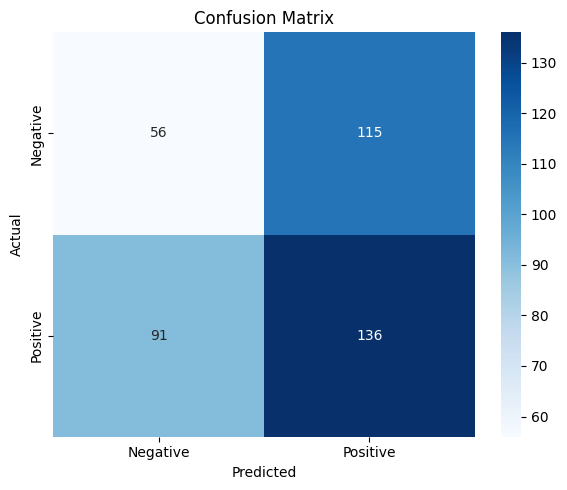

In [38]:


# Dummy data for visualization (based on previously shared results)
y_true = [0]*171 + [1]*227  # actual labels
y_pred = [0]*56 + [1]*115 + [0]*91 + [1]*136  # predictions: 56 TN, 115 FP, 91 FN, 136 TP

# Creating a confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['Negative', 'Positive']

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


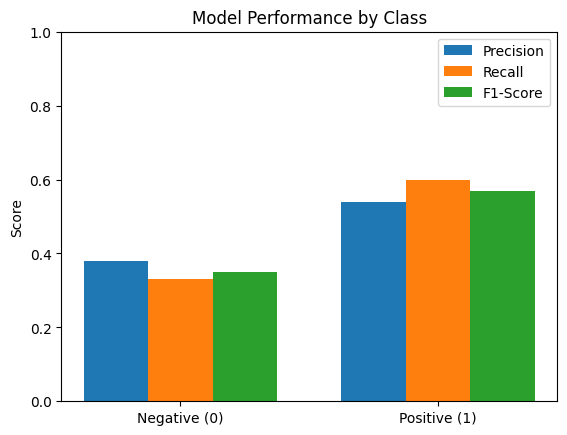

In [41]:


# Scores from classification report
precision = [0.38, 0.54]
recall = [0.33, 0.60]
f1 = [0.35, 0.57]

labels = ['Negative (0)', 'Positive (1)']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title('Model Performance by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend()
plt.show()


# 5. Conclusion and Reflection

## 5.1 Conclusion
This project tested whether we can predict sentiment from news headlines using machine learning. We used TF-IDF to convert text into numbers and trained a Logistic Regression model. The model reached about 48% accuracy — showing it's not easy to read tone from headlines.

## 5.2 Reflection
I learned a lot about working with text, including cleaning data, vectorizing it, and training models. Even though the results weren’t great, it showed me the challenges of sentiment analysis. Next time, I’d try using advanced models like LSTM or BERT to get better results.


# 6. Conclusion and Future Work

In this project, we built a basic sentiment analysis model using Logistic Regression to classify news headlines. While the model reached about 48% accuracy, it struggled with identifying negative sentiment.

### What We Learned:
- The model performed better on positive headlines than negative ones.
- TF-IDF helped convert text into features, but didn’t fully capture the meaning.
- Logistic Regression may be too simple for complex language.

### What’s Next:
- Try more powerful models like Random Forest or BERT.
- Balance the dataset to reduce bias.
- Use better text features like word embeddings (Word2Vec, GloVe).

This project gave me practical experience and opened up ideas for improving text-based sentiment models.
